# Image Segmentation: Traditional Methods

## 1. Thresholding

In [1]:
import cv2
from skimage import exposure, filters, color
import numpy as np
import matplotlib.pyplot as plt

### Global Thresholding

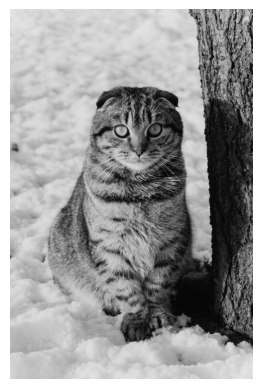

In [2]:
# Read image
img = cv2.imread('images/cat_snow.jpg')
# Convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Display image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

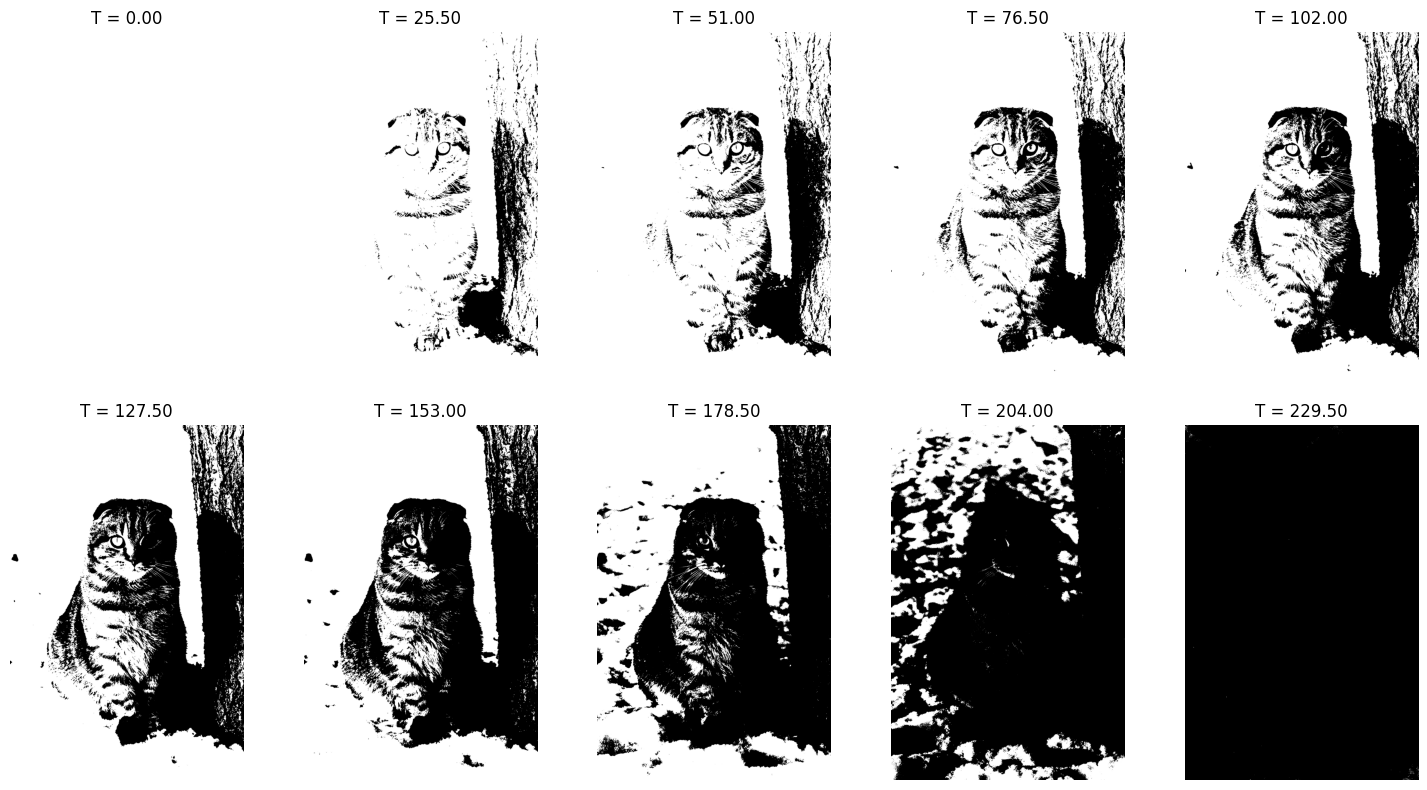

In [3]:
img_blurred = cv2.GaussianBlur(img, (7, 7), 0)

# Define threshold values
th_values = np.linspace(0, 255, 11)

# Plot thresholded images
fig, axis = plt.subplots(2, 5, figsize=(15, 8), sharey=True)
for th, ax in zip(th_values, axis.flatten()):
    _, mask = cv2.threshold(img_blurred, th, 255, cv2.THRESH_BINARY)
    ax.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
    ax.set_title('T = %.2f' % th)
    ax.axis('off')

plt.tight_layout()
plt.show()

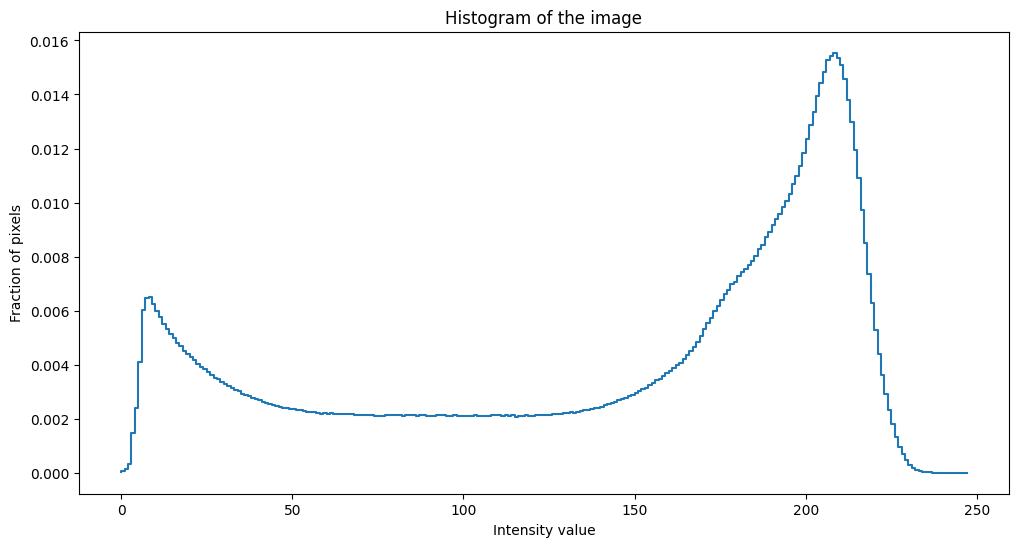

In [4]:
plt.figure(figsize=(12, 6))
freq, bins = exposure.histogram(img)
plt.step(bins, freq*1.0/freq.sum())
plt.xlabel('Intensity value')
plt.ylabel('Fraction of pixels')
plt.title('Histogram of the image')
plt.show()

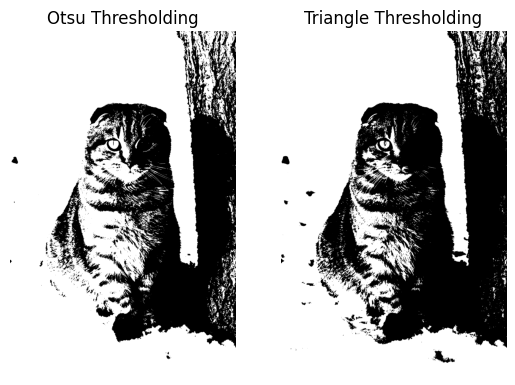

In [5]:
# Thresholding
_, otsu_mask = cv2.threshold(img_blurred, 0, 255, cv2.THRESH_OTSU)
_, tr_mask = cv2.threshold(img_blurred, 0, 255, cv2.THRESH_TRIANGLE)

# Plotting
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
ax1.imshow(otsu_mask, cmap='gray')
ax1.set_title('Otsu Thresholding')
ax2.imshow(tr_mask, cmap='gray')
ax2.set_title('Triangle Thresholding')

for ax in fig.axes:
    ax.axis('off')

plt.show()

### Adaptive Thresholding

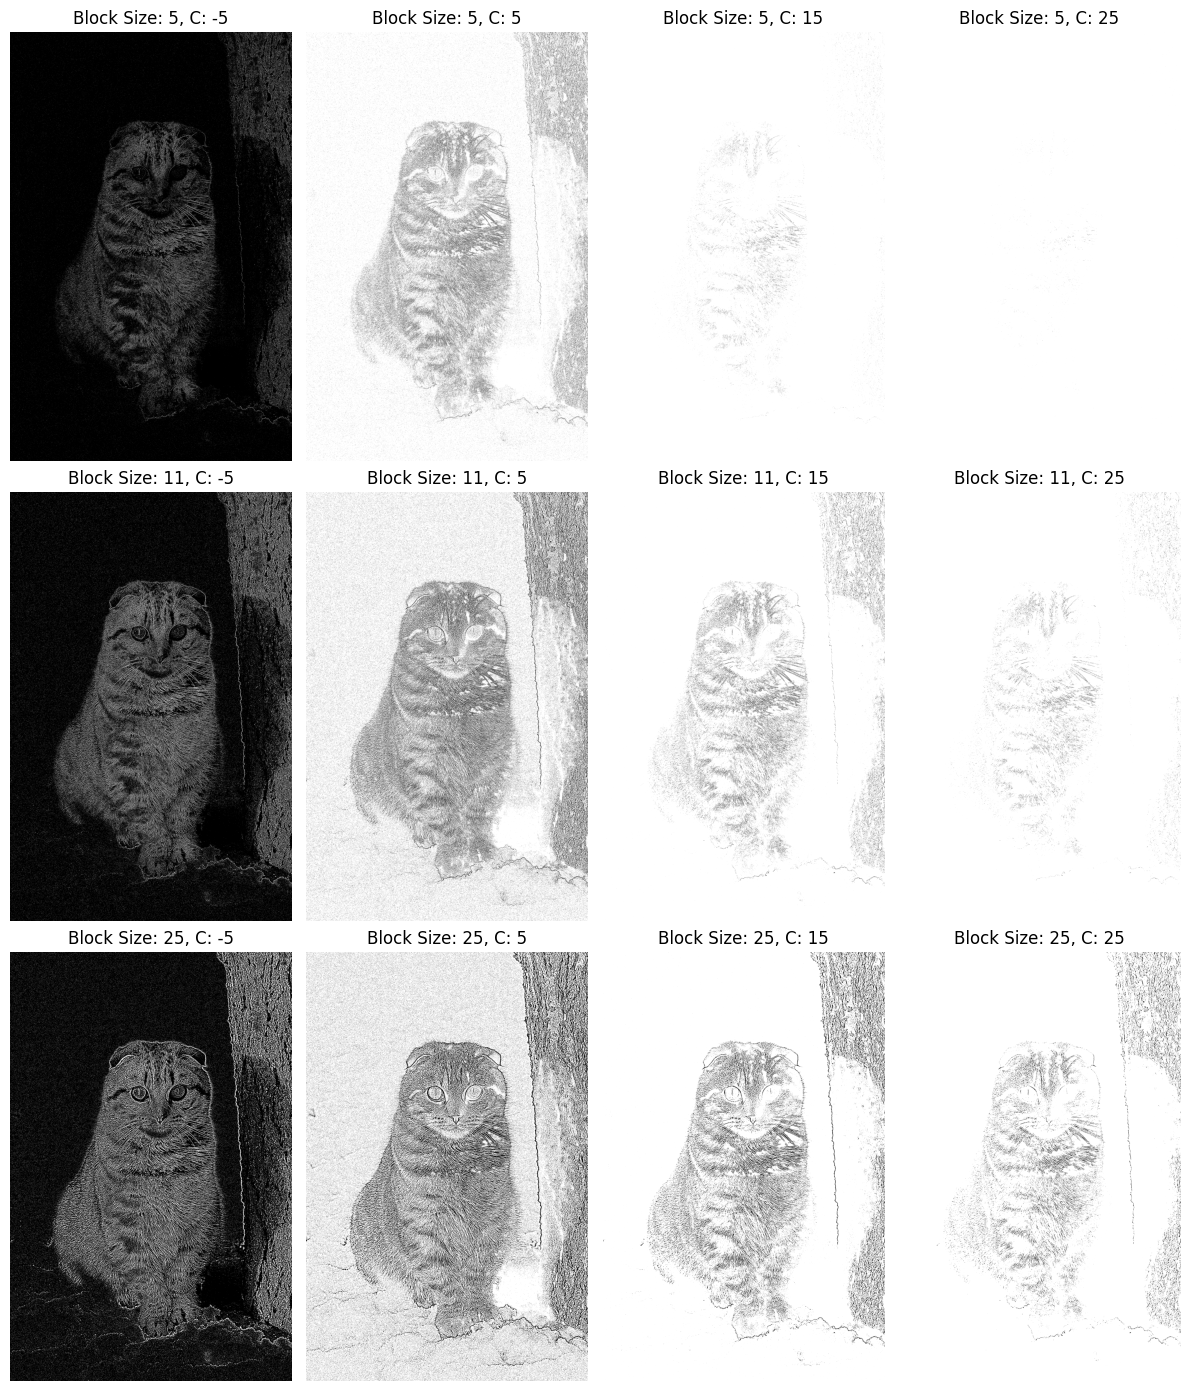

In [6]:
block_sizes = [5, 11, 25]
constants = [-5, 5, 15, 25]

# Plot the thresholded images with different block sizes and constants
plt.figure(figsize=(12, 14))

for i, block_size in enumerate(block_sizes):
    for j, constant in enumerate(constants):
        # Apply adaptive thresholding
        th = cv2.adaptiveThreshold(
            img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, constant
        )

        # Plot the thresholded image
        plt.subplot(len(block_sizes), len(constants), i * len(constants) + j + 1)
        plt.imshow(th, cmap="gray")
        plt.title(f"Block Size: {block_size}, C: {constant}")
        plt.axis("off")

plt.tight_layout()
plt.show()


## 2. Edge-Based Segmentation

### Canny Edge Detection

In [7]:
from skimage import data, filters, feature
import numpy as np
import matplotlib.pyplot as plt

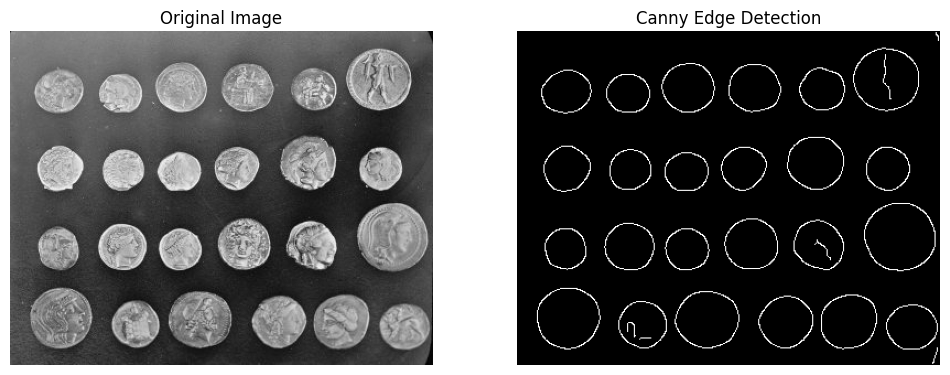

In [8]:
# Read the image in grayscale
image = data.coins()

# Apply Canny edge detection
edges_canny = feature.canny(image, sigma=3)

# Display the original and Canny edge-detected images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(edges_canny, cmap='gray')
ax[1].set_title('Canny Edge Detection')
ax[1].axis('off')
plt.show()

### Sobel Edge Detection

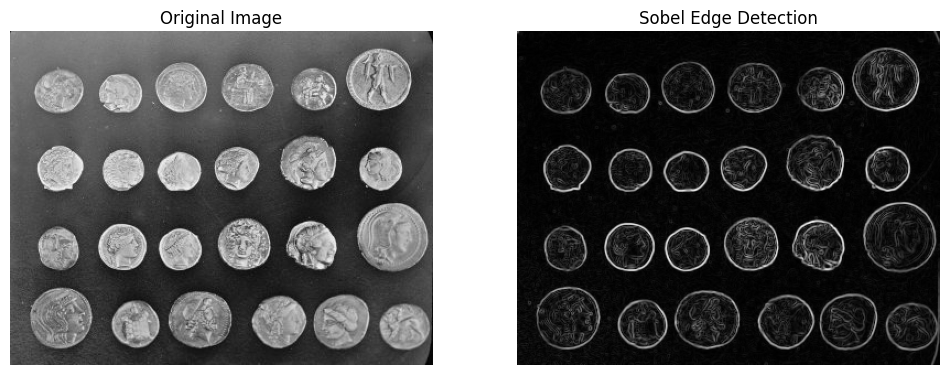

In [9]:
# Read the image in grayscale
image = data.coins()

# Apply Sobel edge detection
edges_sobel = filters.sobel(image)

# Display the original and Sobel edge-detected images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(edges_sobel, cmap='gray')
ax[1].set_title('Sobel Edge Detection')
ax[1].axis('off')
plt.show()

## 3. Region-based segmentation - Watershed

In [10]:
from skimage import data, filters, exposure, segmentation, color
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import numpy as np

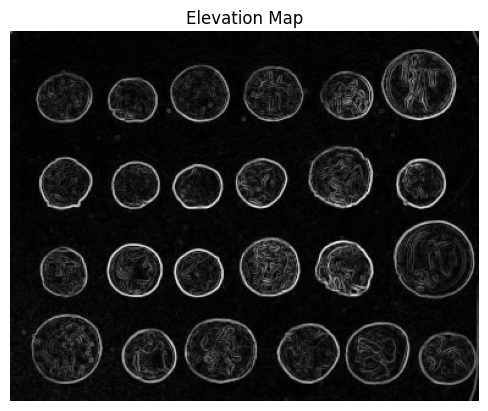

In [11]:
img = data.coins()
elevation_map = filters.sobel(img)

plt.imshow(elevation_map, cmap=plt.cm.gray)
plt.title('Elevation Map')
plt.axis('off')
plt.show()

plt.show()

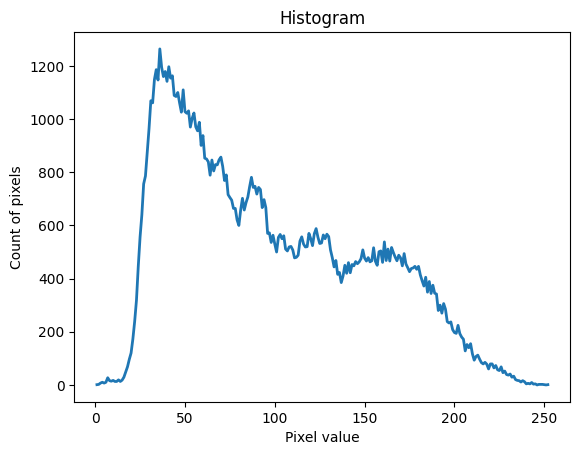

In [12]:
hist, hist_centers = exposure.histogram(img)

plt.plot(hist_centers, hist, lw=2)
plt.xlabel('Pixel value')
plt.ylabel('Count of pixels')
plt.title('Histogram')
plt.show()

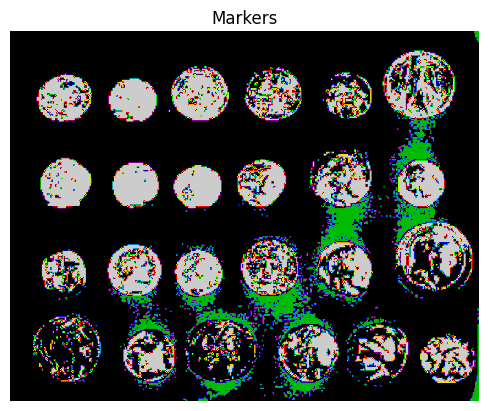

In [13]:
markers = np.zeros_like(img)
markers[img < 30] = 1
markers[img > 150] = 2

plt.imshow(markers, cmap=plt.cm.nipy_spectral)
plt.title('Markers')
plt.axis('off')
plt.show()

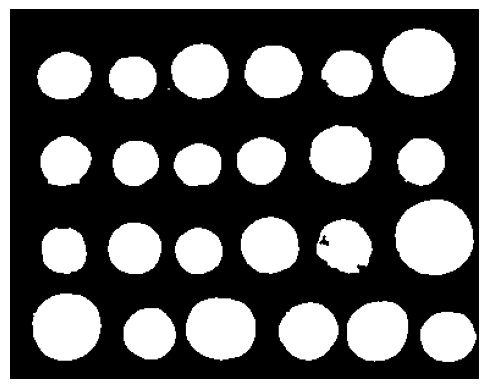

In [14]:
seg = segmentation.watershed(elevation_map, markers)

plt.imshow(seg, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

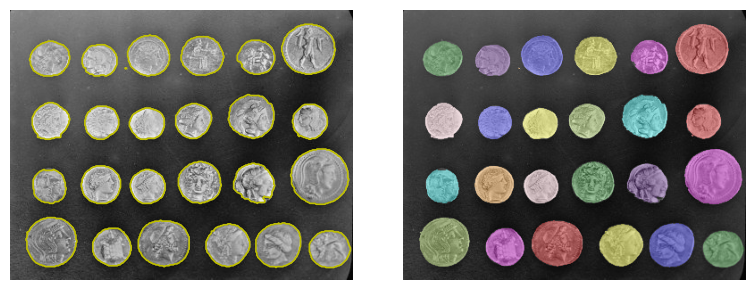

In [15]:
seg = ndi.binary_fill_holes(seg - 1)
labeled, _ = ndi.label(seg)
image_label_overlay = color.label2rgb(labeled, image=img, bg_label=0)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].contour(seg, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay)

for a in axes:
    a.axis('off')

plt.tight_layout()
plt.show()

## 4. Clustering - K-means

In [16]:
from skimage import io, segmentation, color, data
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [17]:
# Load the image
img = cv2.imread('images/cat_green_bg.jpg')

# Convert the image into a numpy array
img_convert = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Reshape the image into a 2D array of pixels and 3 color values (RGB)
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)

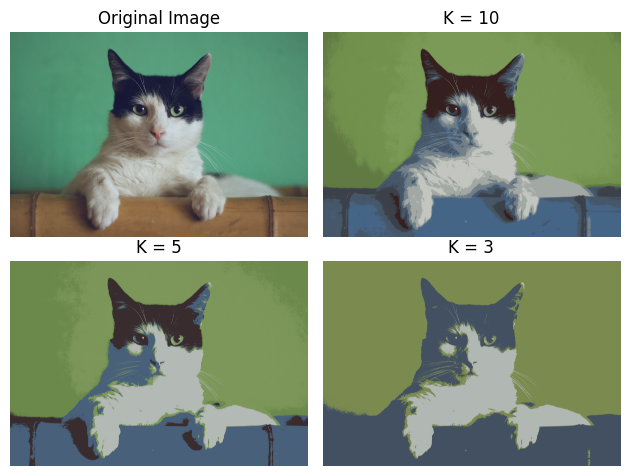

In [18]:
# Define the number of clusters(K) 
k_values = [10, 5, 3]

# Plot the original image and the images with the different values of K (
fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_convert)
ax[0, 0].set_title("Original Image")
ax[0, 0].axis('off')

for i, (k, ax) in enumerate(zip(k_values, ax.flatten()[1:])):
    # Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    # Apply KMeans
    ret,label,center=cv2.kmeans(vectorized, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img_convert.shape))

    # Plot the image
    ax.imshow(result_image)
    ax.set_title("K = {}".format(k))
    ax.axis('off')

plt.tight_layout()
plt.show()  